# Company Credit Scoring Prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
#read csv
df = pd.read_csv('./data/IGP_data_export.csv', encoding='ISO-8859-1')
df

,Unnamed: 0,Company name,Credit score,Current ratio (x)\nLast avail. yr,Gearing\nLast avail. yr,Debtor Collection\nLast avail. yr,Turnover\nth GBP Last avail. yr,Profit (Loss) before Taxation\nth GBP Last avail. yr,Net Tangible Assets\nth GBP Last avail. yr,Profit Margin\nLast avail. yr,...,Current Liabilities\nth GBP Last avail. yr,Return on Total Assets\nLast avail. yr,Gross margin\nLast avail. yr,Net Assets Turnover (x)\nLast avail. yr,Liquidity ratio (x)\nLast avail. yr,Credit score date,Likelihood of failure\n%,Credit limit\nGBP,Company status,Profit (Loss) after Tax\nth GBP Last avail. yr
0,1.0,CRAYON LIMITED,83,1.13,368.00,987.42,"7,229",975,"2,977",13.49,...,"-20,700",4.12,98.10,2.43,1.13,07-03-2024,0.9,"1,39,452",Active,749
1,2.0,OCTANE CAPITAL LIMITED,86,4.73,367.62,980.03,"35,017","4,331","3,44,262",12.37,...,"-92,347",0.99,29.03,0.10,4.73,04-05-2023,0.9,"55,08,000",Active,"3,429"
2,3.0,ULVERSTON AUCTION MART PUBLIC LIMITED COMPANY(...,89,1.59,89.65,975.60,663,-29,"1,031",-4.32,...,"-1,116",-1.33,100.00,0.64,1.59,05-07-2023,0.9,"40,519",Active,-24
3,4.0,TOCG UK LIMITED,41,5.47,54.28,957.81,"1,732",276,"22,689",15.94,...,"-4,126",1.44,38.51,0.11,3.36,16-11-2023,5.0,"7,33,880",Active,290
4,5.0,CURRENCIES DIRECT LIMITED,97,1.32,9.12,954.17,"34,719","15,862","68,142",45.69,...,"-1,87,360",5.87,83.69,0.42,1.32,14-03-2024,0.9,"40,20,000",Active,"11,293"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,42996.0,THE ARTHOUSE GLASGOW LIMITED,89,0.17,27.24,0.99,"1,375",-73,"4,992",-5.28,...,"-1,590",-1.10,46.99,0.28,0.17,06-10-2023,0.9,"1,45,747",Active,-73
42996,42997.0,DAISH'S GROUP LIMITED,92,0.72,160.71,0.99,"29,184",766,"23,470",2.62,...,"-9,172",2.23,63.18,1.16,0.69,19-07-2023,0.9,"4,69,095",Active,810
42997,42998.0,DOW SILICONES UK LIMITED,68,2.48,10.59,0.99,"5,80,707","4,512","3,28,621",0.78,...,"-1,05,578",1.04,1.56,1.77,1.68,18-01-2024,2.2,"80,82,000",Active,"8,243"
42998,42999.0,VEHICLE TRADE CENTRE LTD,97,6.87,12.33,0.99,"5,948",524,"2,249",8.81,...,-379,19.93,21.72,2.64,3.88,02-01-2024,0.9,"1,53,948",Active,425


### Data Cleaning

In [5]:
#correct columns names
names = {
    'Unnamed: 0' : 'ID',
    'Credit limit\nGBP' : 'Credit limit',
    'Likelihood of failure\n%' : 'Likelihood of failure(%)',
    'Profit margin\nLast avail. yr': 'Profit Margin',
    'Gross margin\nLast avail. yr': 'Gross Margin',
    'Debtor Collection\nLast avail. yr': 'Debtor Collection',
    'Creditors Payment\nLast avail. yr': 'Creditors Payment',
    'Current ratio (x)\nLast avail. yr': 'Current Ratio',
    'Liquidity ratio (x)\nLast avail. yr': 'Liquidity Ratio',
    'Gearing\nLast avail. yr': 'Gearing',
    'Return on Total Assets\nLast avail. yr': 'Return on Total Assets',
    'Profit (Loss) before Taxation\nth GBP Last avail. yr': 'Profit before Tax',
    'Profit (Loss) after Tax\nth GBP Last avail. yr': 'Profit after Tax',
    'Turnover\nth GBP Last avail. yr': 'Turnover',
    'Total Assets\nth GBP Last avail. yr': 'Total Assets',
    'Number of employees\nLast avail. yr': 'Number of Employees',
    'Net Current Assets\nth GBP Last avail. yr': 'Net Current Assets',
    'Current Liabilities\nth GBP Last avail. yr': 'Current Liabilities',
    'Net Tangible Assets\nth GBP Last avail. yr': 'Net Tangible Assets',
    'Profit Margin\nLast avail. yr': 'Profit Margin',
    'Net Assets Turnover (x)\nLast avail. yr': 'Net Assets Turnover (x)'
}
df.rename(columns=names, inplace=True)
df

,ID,Company name,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,...,Current Liabilities,Return on Total Assets,Gross Margin,Net Assets Turnover (x),Liquidity Ratio,Credit score date,Likelihood of failure(%),Credit limit,Company status,Profit after Tax
0,1.0,CRAYON LIMITED,83,1.13,368.00,987.42,"7,229",975,"2,977",13.49,...,"-20,700",4.12,98.10,2.43,1.13,07-03-2024,0.9,"1,39,452",Active,749
1,2.0,OCTANE CAPITAL LIMITED,86,4.73,367.62,980.03,"35,017","4,331","3,44,262",12.37,...,"-92,347",0.99,29.03,0.10,4.73,04-05-2023,0.9,"55,08,000",Active,"3,429"
2,3.0,ULVERSTON AUCTION MART PUBLIC LIMITED COMPANY(...,89,1.59,89.65,975.60,663,-29,"1,031",-4.32,...,"-1,116",-1.33,100.00,0.64,1.59,05-07-2023,0.9,"40,519",Active,-24
3,4.0,TOCG UK LIMITED,41,5.47,54.28,957.81,"1,732",276,"22,689",15.94,...,"-4,126",1.44,38.51,0.11,3.36,16-11-2023,5.0,"7,33,880",Active,290
4,5.0,CURRENCIES DIRECT LIMITED,97,1.32,9.12,954.17,"34,719","15,862","68,142",45.69,...,"-1,87,360",5.87,83.69,0.42,1.32,14-03-2024,0.9,"40,20,000",Active,"11,293"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,42996.0,THE ARTHOUSE GLASGOW LIMITED,89,0.17,27.24,0.99,"1,375",-73,"4,992",-5.28,...,"-1,590",-1.10,46.99,0.28,0.17,06-10-2023,0.9,"1,45,747",Active,-73
42996,42997.0,DAISH'S GROUP LIMITED,92,0.72,160.71,0.99,"29,184",766,"23,470",2.62,...,"-9,172",2.23,63.18,1.16,0.69,19-07-2023,0.9,"4,69,095",Active,810
42997,42998.0,DOW SILICONES UK LIMITED,68,2.48,10.59,0.99,"5,80,707","4,512","3,28,621",0.78,...,"-1,05,578",1.04,1.56,1.77,1.68,18-01-2024,2.2,"80,82,000",Active,"8,243"
42998,42999.0,VEHICLE TRADE CENTRE LTD,97,6.87,12.33,0.99,"5,948",524,"2,249",8.81,...,-379,19.93,21.72,2.64,3.88,02-01-2024,0.9,"1,53,948",Active,425


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        43000 non-null  float64
 1   Company name              43000 non-null  object 
 2   Credit score              43000 non-null  object 
 3   Current Ratio             43000 non-null  float64
 4   Gearing                   43000 non-null  float64
 5   Debtor Collection         43000 non-null  float64
 6   Turnover                  43000 non-null  object 
 7   Profit before Tax         43000 non-null  object 
 8   Net Tangible Assets       43000 non-null  object 
 9   Profit Margin             43000 non-null  float64
 10  Number of Employees       43000 non-null  object 
 11  Net Current Assets        43000 non-null  object 
 12  Total Assets              43000 non-null  object 
 13  Current Liabilities       43000 non-null  object 
 14  Return

In [7]:
df.isna().sum()

ID                            0
Company name                  0
Credit score                  0
Current Ratio                 0
Gearing                       0
Debtor Collection             0
Turnover                      0
Profit before Tax             0
Net Tangible Assets           0
Profit Margin                 0
Number of Employees           0
Net Current Assets            0
Total Assets                  0
Current Liabilities           0
Return on Total Assets        0
Gross Margin                  0
Net Assets Turnover (x)       0
Liquidity Ratio               0
Credit score date           986
Likelihood of failure(%)      0
Credit limit                  0
Company status                0
Profit after Tax              0
dtype: int64

In [8]:
df.applymap(lambda x: x == 'n.a.').sum()

ID                             0
Company name                   0
Credit score                 986
Current Ratio                  0
Gearing                        0
Debtor Collection              0
Turnover                       0
Profit before Tax              0
Net Tangible Assets            0
Profit Margin                  0
Number of Employees            0
Net Current Assets             0
Total Assets                   0
Current Liabilities            0
Return on Total Assets         0
Gross Margin                   0
Net Assets Turnover (x)        0
Liquidity Ratio                0
Credit score date              0
Likelihood of failure(%)    1006
Credit limit                1224
Company status                 0
Profit after Tax               0
dtype: int64

In [9]:
df1 = df.dropna(subset=['Credit score date'])
na_values = df1[df1.applymap(lambda x: x == 'n.a.').any(axis=1)].index
df1 = df1.drop(index=na_values)
df1

,ID,Company name,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,...,Current Liabilities,Return on Total Assets,Gross Margin,Net Assets Turnover (x),Liquidity Ratio,Credit score date,Likelihood of failure(%),Credit limit,Company status,Profit after Tax
0,1.0,CRAYON LIMITED,83,1.13,368.00,987.42,"7,229",975,"2,977",13.49,...,"-20,700",4.12,98.10,2.43,1.13,07-03-2024,0.9,"1,39,452",Active,749
1,2.0,OCTANE CAPITAL LIMITED,86,4.73,367.62,980.03,"35,017","4,331","3,44,262",12.37,...,"-92,347",0.99,29.03,0.10,4.73,04-05-2023,0.9,"55,08,000",Active,"3,429"
2,3.0,ULVERSTON AUCTION MART PUBLIC LIMITED COMPANY(...,89,1.59,89.65,975.60,663,-29,"1,031",-4.32,...,"-1,116",-1.33,100.00,0.64,1.59,05-07-2023,0.9,"40,519",Active,-24
3,4.0,TOCG UK LIMITED,41,5.47,54.28,957.81,"1,732",276,"22,689",15.94,...,"-4,126",1.44,38.51,0.11,3.36,16-11-2023,5.0,"7,33,880",Active,290
4,5.0,CURRENCIES DIRECT LIMITED,97,1.32,9.12,954.17,"34,719","15,862","68,142",45.69,...,"-1,87,360",5.87,83.69,0.42,1.32,14-03-2024,0.9,"40,20,000",Active,"11,293"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,42996.0,THE ARTHOUSE GLASGOW LIMITED,89,0.17,27.24,0.99,"1,375",-73,"4,992",-5.28,...,"-1,590",-1.10,46.99,0.28,0.17,06-10-2023,0.9,"1,45,747",Active,-73
42996,42997.0,DAISH'S GROUP LIMITED,92,0.72,160.71,0.99,"29,184",766,"23,470",2.62,...,"-9,172",2.23,63.18,1.16,0.69,19-07-2023,0.9,"4,69,095",Active,810
42997,42998.0,DOW SILICONES UK LIMITED,68,2.48,10.59,0.99,"5,80,707","4,512","3,28,621",0.78,...,"-1,05,578",1.04,1.56,1.77,1.68,18-01-2024,2.2,"80,82,000",Active,"8,243"
42998,42999.0,VEHICLE TRADE CENTRE LTD,97,6.87,12.33,0.99,"5,948",524,"2,249",8.81,...,-379,19.93,21.72,2.64,3.88,02-01-2024,0.9,"1,53,948",Active,425


In [10]:
df2 = df1.copy()

In [11]:
# Convert numeric columns to integers
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

df2[numeric_columns] = df2[numeric_columns].astype(int)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41756 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        41756 non-null  int32 
 1   Company name              41756 non-null  object
 2   Credit score              41756 non-null  object
 3   Current Ratio             41756 non-null  int32 
 4   Gearing                   41756 non-null  int32 
 5   Debtor Collection         41756 non-null  int32 
 6   Turnover                  41756 non-null  object
 7   Profit before Tax         41756 non-null  object
 8   Net Tangible Assets       41756 non-null  object
 9   Profit Margin             41756 non-null  int32 
 10  Number of Employees       41756 non-null  object
 11  Net Current Assets        41756 non-null  object
 12  Total Assets              41756 non-null  object
 13  Current Liabilities       41756 non-null  object
 14  Return on Total Assets

In [13]:
#remove the commas from specific columns

columns_to_process = ['Credit limit', 'Profit before Tax','Turnover', 'Total Assets', 'Number of Employees',
                      'Net Tangible Assets', 'Current Liabilities','Net Current Assets','Profit after Tax']

df2[columns_to_process] = df2[columns_to_process].astype(str)

df2[columns_to_process] = df2[columns_to_process].replace(',', '', regex=True)
df2[columns_to_process] = df2[columns_to_process].apply(pd.to_numeric, errors='coerce')


In [14]:
# Change datatype of 'Credit score' and 'Credit score date'
df2['Credit score'] = pd.to_numeric(df2['Credit score'], errors='coerce')
df2['Credit score date'] = pd.to_datetime(df2['Credit score date'], format='%d-%m-%Y', errors='coerce')

In [15]:
#convert columns into float
float_columns = ['Likelihood of failure(%)', 'Profit Margin', 'Gross Margin', 'Debtor Collection',
                 'Current Ratio', 'Liquidity Ratio', 'Gearing', 'Return on Total Assets']
df2[float_columns] = df2[float_columns].replace(',', '', regex=True).astype(float)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41756 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        41756 non-null  int32         
 1   Company name              41756 non-null  object        
 2   Credit score              41756 non-null  int64         
 3   Current Ratio             41756 non-null  float64       
 4   Gearing                   41756 non-null  float64       
 5   Debtor Collection         41756 non-null  float64       
 6   Turnover                  41756 non-null  int64         
 7   Profit before Tax         41756 non-null  int64         
 8   Net Tangible Assets       41756 non-null  int64         
 9   Profit Margin             41756 non-null  float64       
 10  Number of Employees       41756 non-null  int64         
 11  Net Current Assets        41756 non-null  int64         
 12  Total Assets      

In [17]:
df2.head()

,ID,Company name,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,...,Current Liabilities,Return on Total Assets,Gross Margin,Net Assets Turnover (x),Liquidity Ratio,Credit score date,Likelihood of failure(%),Credit limit,Company status,Profit after Tax
0,1,CRAYON LIMITED,83,1.0,368.0,987.0,7229,975,2977,13.0,...,-20700,4.0,98.0,2,1.0,2024-03-07,0.9,139452,Active,749
1,2,OCTANE CAPITAL LIMITED,86,4.0,367.0,980.0,35017,4331,344262,12.0,...,-92347,0.0,29.0,0,4.0,2023-05-04,0.9,5508000,Active,3429
2,3,ULVERSTON AUCTION MART PUBLIC LIMITED COMPANY(...,89,1.0,89.0,975.0,663,-29,1031,-4.0,...,-1116,-1.0,100.0,0,1.0,2023-07-05,0.9,40519,Active,-24
3,4,TOCG UK LIMITED,41,5.0,54.0,957.0,1732,276,22689,15.0,...,-4126,1.0,38.0,0,3.0,2023-11-16,5.0,733880,Active,290
4,5,CURRENCIES DIRECT LIMITED,97,1.0,9.0,954.0,34719,15862,68142,45.0,...,-187360,5.0,83.0,0,1.0,2024-03-14,0.9,4020000,Active,11293


In [18]:
df2.describe()

,ID,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,Number of Employees,Net Current Assets,Total Assets,Current Liabilities,Return on Total Assets,Gross Margin,Net Assets Turnover (x),Liquidity Ratio,Likelihood of failure(%),Credit limit,Profit after Tax
count,41756.000000,41756.000000,41756.000000,41756.000000,41756.000000,4.175600e+04,4.175600e+04,4.175600e+04,41756.000000,41756.000000,4.175600e+04,4.175600e+04,4.175600e+04,41756.000000,41756.000000,41756.000000,41756.000000,41756.000000,4.175600e+04,4.175600e+04
mean,21492.165342,86.714963,2.063967,96.820505,52.213263,1.004956e+05,6.694987e+03,5.526250e+04,7.465777,327.422981,1.428410e+04,1.330905e+05,-5.771419e+04,10.753281,35.205647,4.910264,1.630400,1.621848,1.511438e+06,5.250330e+03
std,12383.691176,18.043605,3.479465,155.068636,54.115621,8.555751e+05,1.098053e+05,6.000059e+05,16.213738,2458.827569,1.505965e+05,4.149451e+06,3.790157e+06,19.503031,24.869685,18.280866,3.195116,2.151442,5.245362e+06,9.178806e+04
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.104987e+06,-1.947000e+06,-99.000000,1.000000,-5.010000e+06,0.000000e+00,-7.685780e+08,-168.000000,-84.000000,0.000000,0.000000,0.900000,5.000000e+02,-1.140437e+06
25%,10782.750000,88.000000,1.000000,9.000000,22.000000,8.741750e+03,1.570000e+02,2.548750e+03,1.000000,32.000000,6.447500e+02,6.612000e+03,-1.292025e+04,2.000000,17.000000,1.000000,0.000000,0.900000,1.184892e+05,1.270000e+02
50%,21480.500000,92.000000,1.000000,37.000000,45.000000,1.848850e+04,9.550000e+02,6.622500e+03,5.000000,78.000000,3.122000e+03,1.321400e+04,-4.863000e+03,7.000000,29.000000,2.000000,1.000000,0.900000,3.247870e+05,7.960000e+02
75%,32200.250000,97.000000,2.000000,109.000000,68.000000,4.281050e+04,2.851000e+03,1.709575e+04,12.000000,176.000000,8.589250e+03,3.324125e+04,-2.066750e+03,16.000000,47.000000,5.000000,2.000000,0.900000,8.384848e+05,2.360000e+03
max,43000.000000,99.000000,96.000000,999.000000,987.000000,6.576200e+07,1.126600e+07,6.481200e+07,99.000000,222306.000000,1.090967e+07,8.050100e+08,0.000000e+00,583.000000,100.000000,934.000000,96.000000,17.500000,5.000000e+07,1.084300e+07


In [19]:
output_file = ("data/IGP_clean_data.csv")
df2.to_csv(output_file, index=False)

### Exploratory Data Analysis

In [17]:
num_cols = df2.select_dtypes(include=['int64', 'float64'])

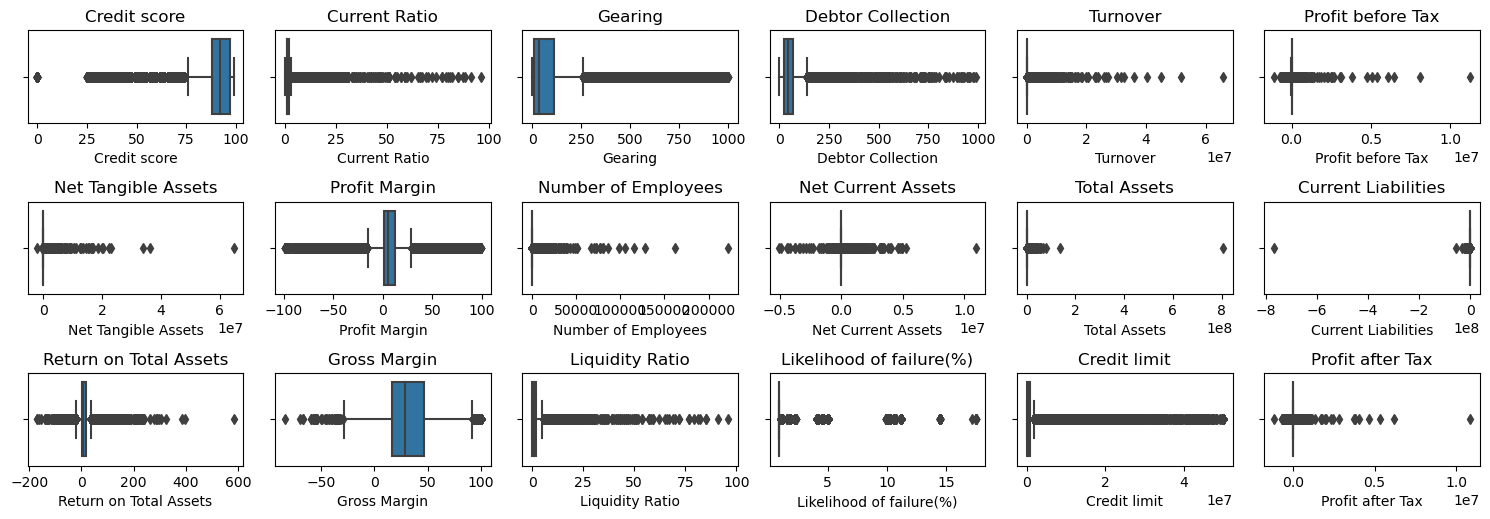

In [18]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols.columns):
    plt.subplot(6, 6, i+1)
    sns.boxplot(x=df2[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

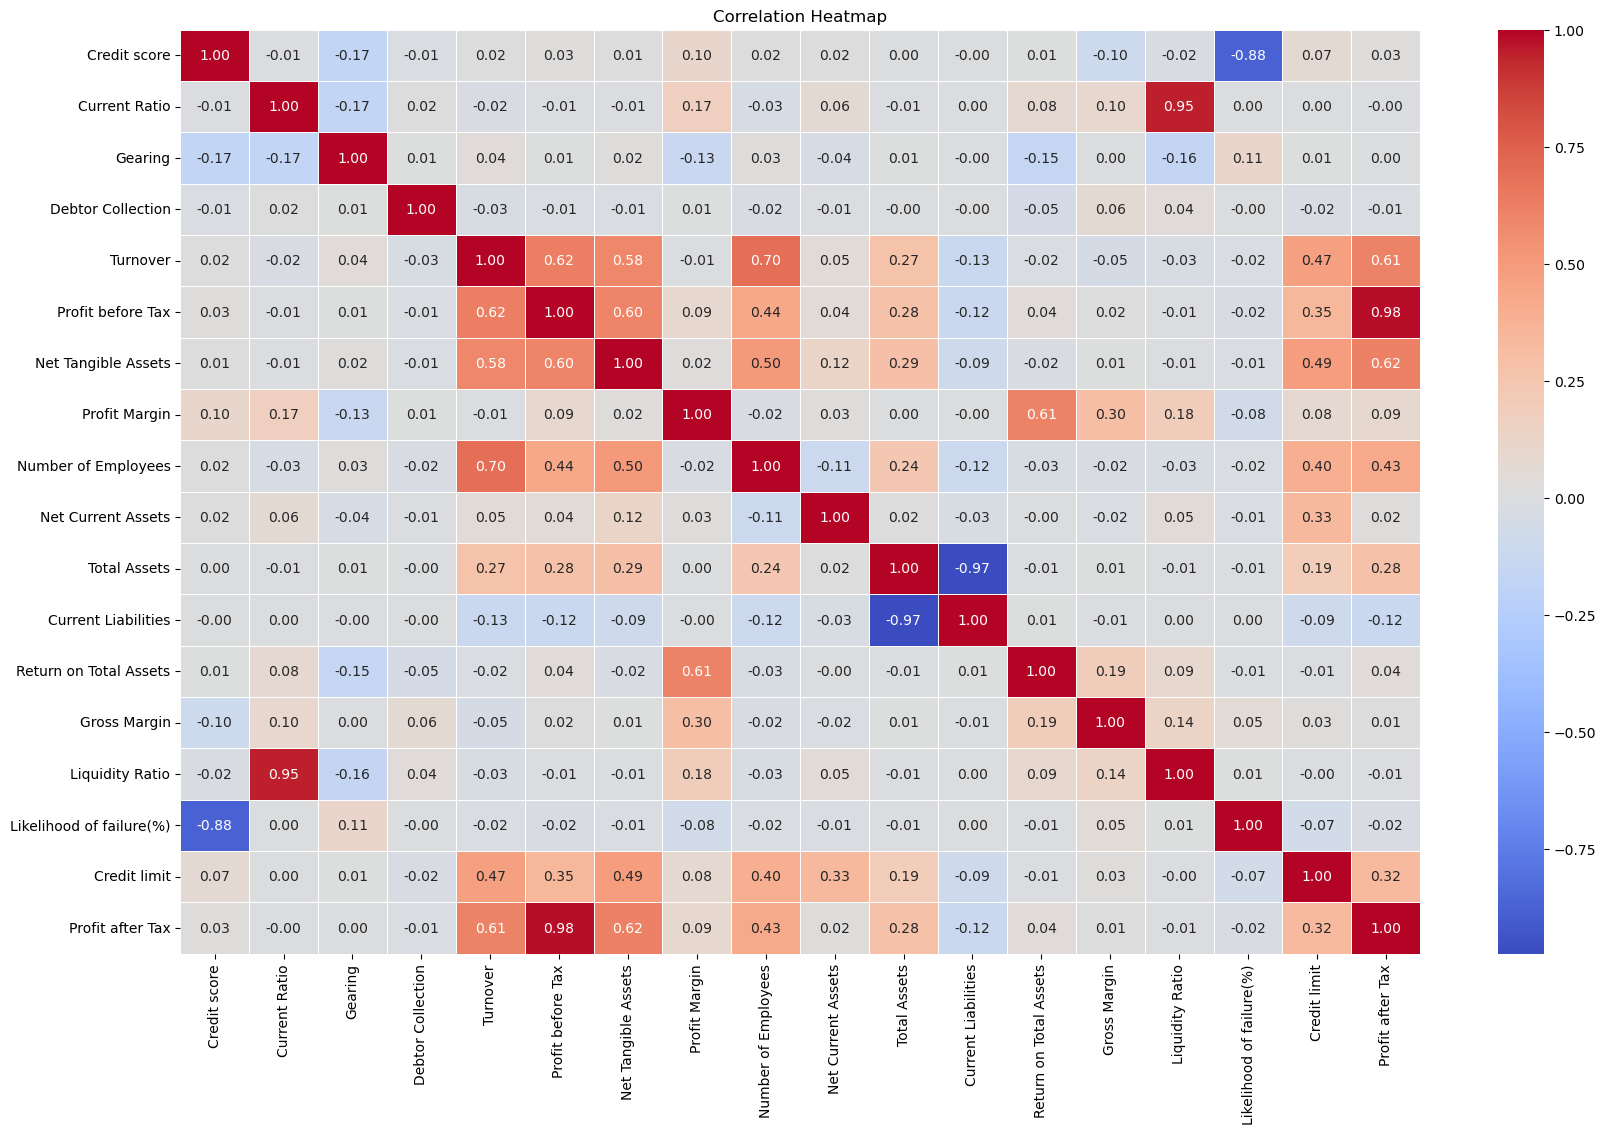

In [19]:
correlation_matrix = num_cols.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
correlation_matrix = df2.corr()
credit_score_correlation = correlation_matrix['Credit score'].sort_values(ascending=False)
print(credit_score_correlation)

Credit score                1.000000
Profit Margin               0.101612
Credit limit                0.073363
Profit after Tax            0.026509
Profit before Tax           0.025840
Net Current Assets          0.017934
Number of Employees         0.017037
Turnover                    0.015226
Net Tangible Assets         0.014717
Return on Total Assets      0.008543
Total Assets                0.002447
Current Liabilities        -0.000313
Current Ratio              -0.006363
Debtor Collection          -0.012708
Liquidity Ratio            -0.019739
ID                         -0.058152
Gross Margin               -0.095577
Net Assets Turnover (x)    -0.098222
Gearing                    -0.168194
Likelihood of failure(%)   -0.879270
Name: Credit score, dtype: float64


C:\Users\jeeva\AppData\Local\Temp\ipykernel_11096\336339541.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


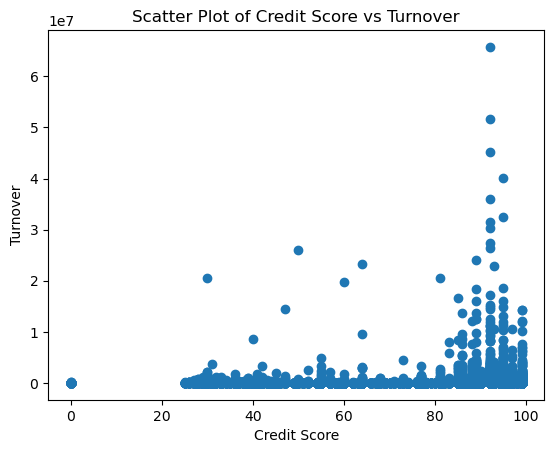

In [21]:
plt.scatter(df2["Credit score"], df2["Turnover"])
plt.xlabel('Credit Score')
plt.ylabel('Turnover')
plt.title('Scatter Plot of Credit Score vs Turnover')
plt.show()

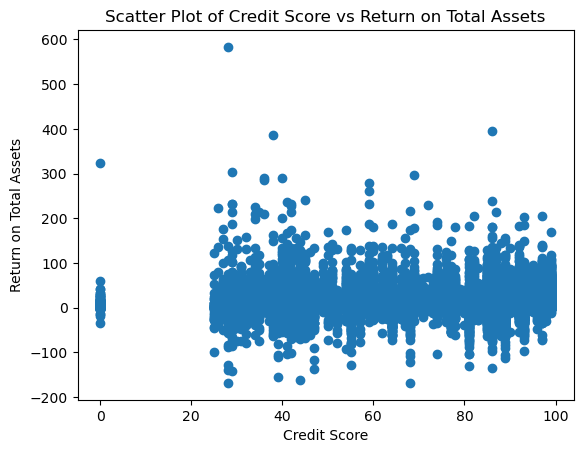

In [22]:
plt.scatter(df2["Credit score"], df2["Return on Total Assets"])
plt.xlabel('Credit Score')
plt.ylabel('Return on Total Assets')
plt.title('Scatter Plot of Credit Score vs Return on Total Assets')
plt.show()

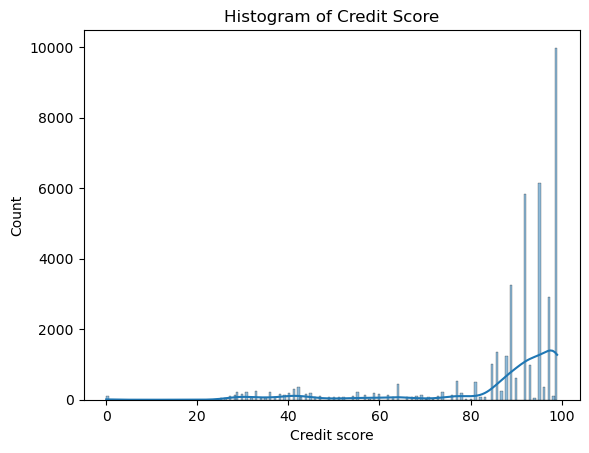

In [23]:
sns.histplot(data=df2, x=df2['Credit score'], kde=True)
plt.title('Histogram of Credit Score')
plt.show()

In [24]:
df2["Credit limit"].describe()

count    4.175600e+04
mean     1.511438e+06
std      5.245362e+06
min      5.000000e+02
25%      1.184892e+05
50%      3.247870e+05
75%      8.384848e+05
max      5.000000e+07
Name: Credit limit, dtype: float64

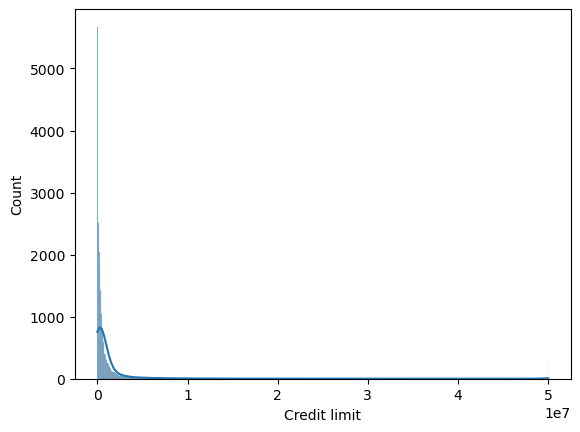

In [25]:
sns.histplot(df2, x=df2['Credit limit'], kde=True)
plt.show()

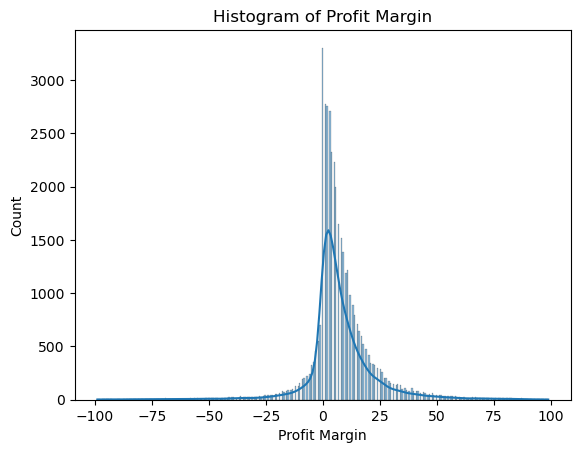

In [26]:
sns.histplot(data=df2, x=df2['Profit Margin'], kde=True)
plt.title('Histogram of Profit Margin')
plt.show()

In [27]:
df2[df2['Profit Margin'] == 0]

,ID,Company name,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,...,Current Liabilities,Return on Total Assets,Gross Margin,Net Assets Turnover (x),Liquidity Ratio,Credit score date,Likelihood of failure(%),Credit limit,Company status,Profit after Tax
51,52,BROADWAY TRAVEL SERVICE(WIMBLEDON)LIMITED,33,1.0,201.0,664.0,6770,-12,2635,0.0,...,-20830,0.0,100.0,2,1.0,2024-01-29,11.2,500,Active,169
86,87,PREMIER MEDICAL GROUP LIMITED,86,1.0,319.0,543.0,23815,-51,6735,0.0,...,-30429,0.0,27.0,3,1.0,2023-10-06,0.9,168303,Active,-36
98,99,IESA A & D LIMITED,55,1.0,196.0,524.0,2266,21,1266,0.0,...,-8996,0.0,78.0,1,1.0,2024-04-08,4.2,26077,Active,13
149,150,CASHPOT LIMITED,52,1.0,250.0,426.0,468,0,26,0.0,...,-1249,0.0,74.0,14,1.0,2024-02-28,4.1,8538,Active,0
155,156,FAST REACT SYSTEMS LIMITED,89,1.0,77.0,421.0,5752,36,2167,0.0,...,-4943,0.0,52.0,2,1.0,2023-06-21,0.9,56057,Active,-161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42963,42964,AZEBRA GROUP LTD,60,1.0,49.0,1.0,61065,25,214,0.0,...,-3689,0.0,1.0,284,1.0,2024-01-04,2.2,4955,Active,14
42978,42979,JUMP BICYCLES UNITED KINGDOM LIMITED,30,1.0,811.0,1.0,6463,-20,851,0.0,...,-7032,0.0,71.0,7,1.0,2022-10-06,11.2,5197,Active,-37
42980,42981,M.M. BELLINGER AND SONS LIMITED,92,1.0,24.0,1.0,20673,70,2404,0.0,...,-1525,1.0,6.0,8,0.0,2023-06-12,0.9,82558,Active,70
42989,42990,VIOVET LTD,89,1.0,12.0,1.0,39837,160,1989,0.0,...,-6872,1.0,18.0,17,0.0,2023-10-12,0.9,75940,Active,192


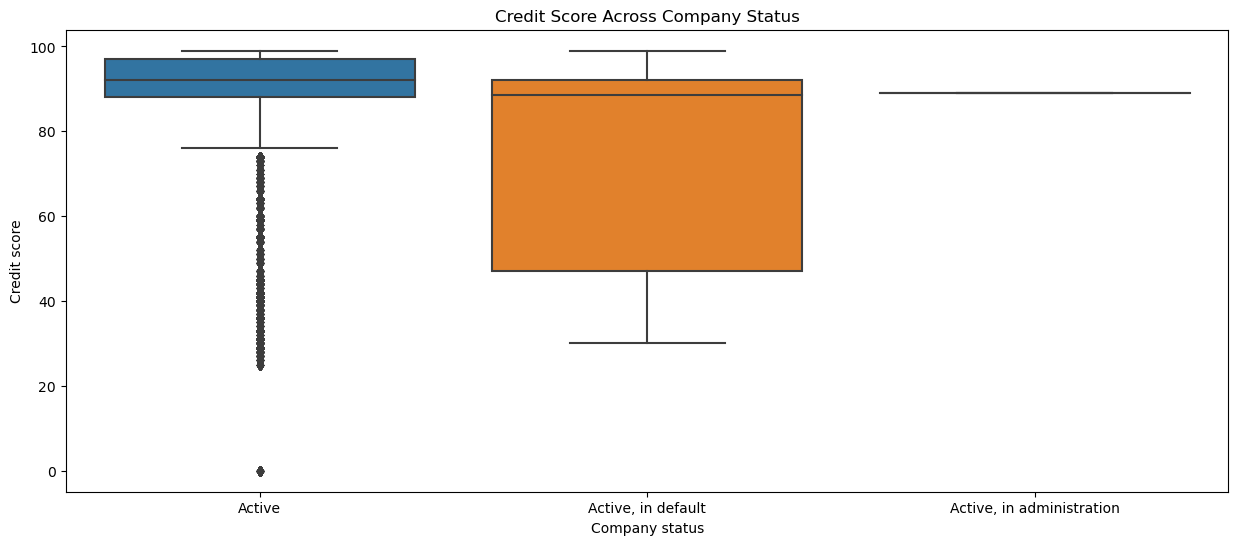

In [28]:
plt.figure(figsize = (15,6))
sns.boxplot(data=df2, x='Company status', y='Credit score')
plt.title('Credit Score Across Company Status')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(num_cols)
standardized_df = pd.DataFrame(standardized_data, columns=num_cols.columns)
standardized_df

,Credit score,Current Ratio,Gearing,Debtor Collection,Turnover,Profit before Tax,Net Tangible Assets,Profit Margin,Number of Employees,Net Current Assets,Total Assets,Current Liabilities,Return on Total Assets,Gross Margin,Liquidity Ratio,Likelihood of failure(%),Credit limit,Profit after Tax
0,-0.205891,-0.305788,1.748792,17.274087,-0.109012,-0.052093,-0.087143,0.341333,-0.105101,-0.077135,-0.026369,0.009766,-0.346272,2.524966,-0.197304,-0.335522,-0.261565,-0.049041
1,-0.039625,0.556424,1.742343,17.144733,-0.076533,-0.021529,0.481667,0.279656,-0.121369,2.190854,0.073148,-0.009138,-0.551371,-0.249530,0.741641,-0.335522,0.761932,-0.019843
2,0.126641,-0.305788,-0.050433,17.052337,-0.116686,-0.061236,-0.090386,-0.707173,-0.118929,-0.090482,-0.031557,0.014933,-0.602646,2.605386,-0.197304,-0.335522,-0.280426,-0.057463
3,-2.533613,0.843828,-0.276142,16.719712,-0.115437,-0.058459,-0.054289,0.464687,-0.105101,0.027690,-0.026522,0.014139,-0.500097,0.112361,0.428659,1.570199,-0.148239,-0.054042
4,0.570017,-0.305788,-0.566340,16.664274,-0.076881,0.083485,0.021466,2.314992,-0.085173,0.300827,0.033046,-0.034206,-0.294998,1.921815,-0.197304,-0.335522,0.478250,0.065834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41751,0.126641,-0.593192,-0.450261,-0.964858,-0.115854,-0.061637,-0.083784,-0.768850,-0.122590,-0.103590,-0.030489,0.014808,-0.602646,0.434042,-0.510285,-0.335522,-0.260365,-0.057997
41752,0.292907,-0.593192,0.407434,-0.964858,-0.083350,-0.053996,-0.052988,-0.337112,0.076695,-0.112183,-0.023793,0.012808,-0.448822,1.117613,-0.510285,-0.335522,-0.198720,-0.048376
41753,-1.037220,-0.018384,-0.559891,-0.964858,0.561280,-0.019881,0.455598,-0.460465,0.107198,0.939541,0.072567,-0.012629,-0.500097,-1.375412,-0.197304,0.268731,1.252657,0.032605
41754,0.570017,1.131232,-0.546993,-0.964858,-0.110509,-0.056200,-0.088356,0.032949,-0.125030,-0.080070,-0.031441,0.015128,0.422848,-0.571210,0.428659,-0.335522,-0.258801,-0.052571


In [31]:
# Feature importance ranking
from sklearn.ensemble import RandomForestRegressor

X = num_cols.drop(columns=['Credit score'])
y = num_cols['Credit score']

In [32]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X, y)

RandomForestRegressor(random_state=42)

In [33]:
feature_importances = rf_regressor.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Likelihood of failure(%): 0.9355834401042712
Profit Margin: 0.009438640337137053
Credit limit: 0.005912631226892851
Gearing: 0.005801693272689692
Return on Total Assets: 0.004350533093191665
Net Current Assets: 0.00431361315835127
Number of Employees: 0.004157194685621681
Debtor Collection: 0.004119555866591247
Net Tangible Assets: 0.004075548893153944
Turnover: 0.003867463372495908
Gross Margin: 0.0037084012190271025
Current Liabilities: 0.003698193745364027
Profit before Tax: 0.0034353309379193397
Total Assets: 0.002943792810670705
Profit after Tax: 0.002928070773738133
Liquidity Ratio: 0.0009446456596196391
Current Ratio: 0.0007212508432646724


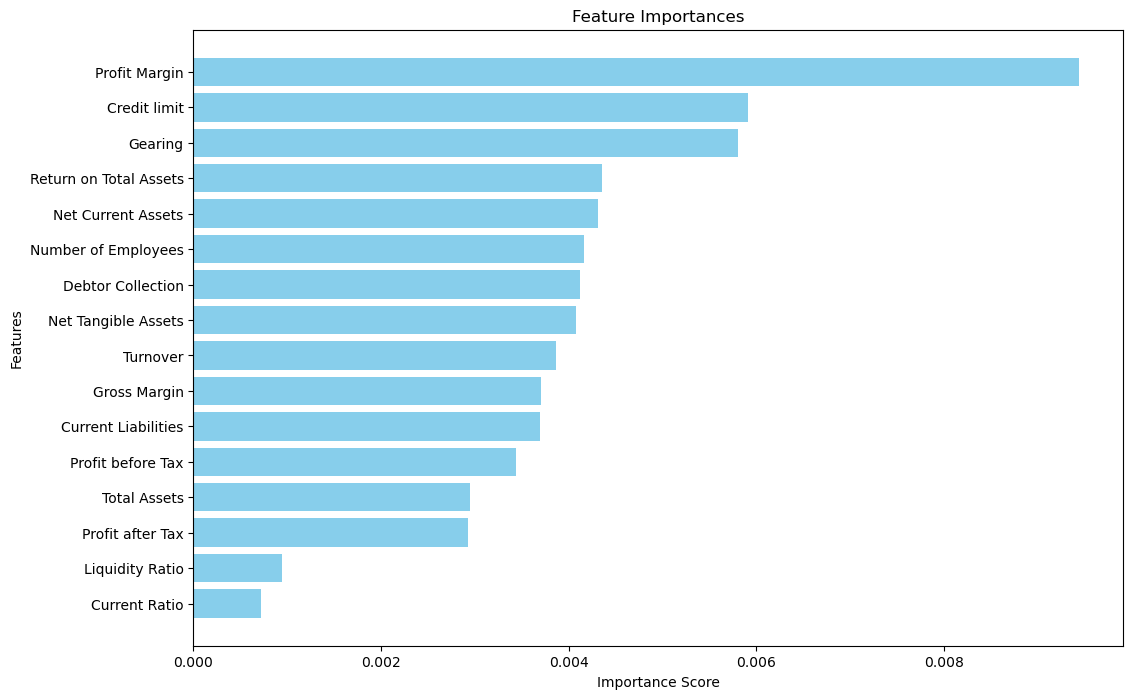

In [34]:
import matplotlib.pyplot as plt

features = [x[0] for x in sorted_feature_importance if x[0] !='Likelihood of failure(%)']
importances = [x[1] for x in sorted_feature_importance if x[0] !='Likelihood of failure(%)']

plt.figure(figsize=(12, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

### Model Training

In [274]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [275]:
# Function to evaluate model with cross-validation and return metrics
def evaluate_model(model, name, X, y):
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mse_scores = -cv_results
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    mae_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    
    return [name, mse_scores.mean(), rmse_scores.mean(), r2_scores.mean(), mae_scores.mean()]

In [276]:
X = standardized_df[['Profit Margin', 'Return on Total Assets', 'Credit limit', 'Likelihood of failure(%)', 'Number of Employees', 'Gearing', 'Net Current Assets']]
y = standardized_df['Credit score']

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVR', SVR())
]

results = []
for name, model in models:
    result = evaluate_model(model, name, X, y)
    results.append(result)

In [277]:
# XGboost
import xgboost as xgb
from xgboost import XGBClassifier

num_bins = 7 
bins = np.linspace(min(y), max(y), num_bins + 1)
y_binned = np.digitize(y, bins) - 1 

model = XGBClassifier()

xgb_results = evaluate_model(model, 'XGBoost', X, y_binned)
results.append(xgb_results)

In [278]:
# Format results into a table
results_df = pd.DataFrame(results, columns=['Model', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (Accuracy)', 'Mean Absolute Error (MAE)'])
results_df

,Model,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Accuracy),Mean Absolute Error (MAE)
0,Linear Regression,0.219453,0.468385,0.780471,0.334549
1,Random Forest,0.050588,0.224895,0.949372,0.177482
2,Gradient Boosting,0.051229,0.226300,0.948744,0.181427
3,SVR,0.068748,0.262147,0.931202,0.195486
4,XGBoost,0.283672,0.532568,0.847322,0.283528


The Random Forest model appears to perform the best among the five models as it has the lowest MSE, RMSE, and MAE, and the highest R-squared value.

In [322]:
# Features that have the most significant impact on the prediction model after training/testing

feature_importances = rf_regressor.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Likelihood of failure(%): 0.9358506208586603
Profit Margin: 0.013447819738231287
Credit limit: 0.011742249031477968
Net Current Assets: 0.010965623624621605
Gearing: 0.010240392976606673
Number of Employees: 0.009144922266450004
Return on Total Assets: 0.008608371503952073


In [33]:
import joblib

X = df2[['Profit Margin', 'Return on Total Assets', 'Credit limit', 'Likelihood of failure(%)', 'Number of Employees', 'Gearing', 'Net Current Assets']]
y = df2['Credit score']

# Initialize and train the RandomForestRegressor model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X, y)

# Saving the RandomForestRegressor model
if random_forest_model:
    joblib.dump(random_forest_model, 'rf_model.pkl')
    print('Random Forest model is saved!')
else:
    print('Random Forest model does not exist.')

Random Forest model is saved!
